In [8]:
# 기본 
import pandas as pd
import numpy as np
import os, glob, re

# 그래프 
import plotly.express as px
import matplotlib.pyplot as plt   # 맷폴렛- 그래프
%matplotlib inline

# ignore warnings
import warnings    # 워닝 방지
warnings.filterwarnings('ignore')

####### matplotlib - 한글 폰트 깨짐 방지 코드 #######
import platform

if platform.system() == 'Darwin':    # 맥
    font_name = 'AppleGothic'
elif platform.system() == 'Linux':   # 리눅스
    font_name = 'NanumGothic'
elif platform.system() == 'Windows': # 윈도우
    font_name = 'Malgun Gothic'
else:
    print('알수없는 시스템. 미적용')

plt.rc('font', family=font_name)

encoding = ['euc-kr','utf-8', 'CP949', 'utf-8-sig'] 

In [9]:
os.getcwd() # 현재 디렉토리위치

'C:\\studyNote\\projectformDK'

In [36]:
# 변수 
path = 'C:\\studyNote\\projectformDK\\data\\'
name = 'data.csv'
data_path = glob.glob(path+name)

In [35]:
glob.glob(path+'*')

['C:\\studyNote\\projectformDK\\data\\data.csv',
 'C:\\studyNote\\projectformDK\\data\\data2.csv',
 'C:\\studyNote\\projectformDK\\data\\기상개황_20200922232758.xlsx',
 'C:\\studyNote\\projectformDK\\data\\등록인구추이_20200922232814.xlsx',
 'C:\\studyNote\\projectformDK\\data\\자연재해.xls',
 'C:\\studyNote\\projectformDK\\data\\자연재해복구비.xls',
 'C:\\studyNote\\projectformDK\\data\\지방세_부담_20200922232824.xlsx',
 'C:\\studyNote\\projectformDK\\data\\풍수해_발생_20200922232742.xlsx']

In [41]:
data.columns

Index(['pay_main', 'die', 'victim', 'area', 'pay_dis', 'pay_rec', 'tem_mean',
       'tem_hi', 'tem_lo', 'rain', 'win_mean', 'win_max', 'win_ins'],
      dtype='object')

In [53]:
data = pd.read_csv(data_path[0], encoding='cp949')
data.info()
data = data.iloc[:,1:]
data.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      24 non-null     int64  
 1   pay_main  24 non-null     int64  
 2   die       24 non-null     int64  
 3   victim    24 non-null     int64  
 4   area      24 non-null     float64
 5   pay_dis   24 non-null     float64
 6   pay_rec   24 non-null     int64  
 7   tem_mean  24 non-null     float64
 8   tem_hi    24 non-null     float64
 9   tem_lo    24 non-null     float64
 10  rain      24 non-null     float64
 11  win_mean  24 non-null     float64
 12  win_max   24 non-null     float64
 13  win_ins   24 non-null     float64
dtypes: float64(9), int64(5)
memory usage: 2.8 KB


,pay_main,die,victim,area,pay_dis,pay_rec,tem_mean,tem_hi,tem_lo,rain,win_mean,win_max,win_ins
19,94515000,2,5916,210.0,179.0,5071,15.1,32.9,-6.0,1693.1,3.2,14.6,21.6
20,14141,0,0,0.0,33.0,381,15.4,33.5,-7.8,1396.7,3.1,15.1,25.3
21,66085150,2,4,0.0,304.3,5906,15.7,37.3,-10.2,1760.2,3.1,18.6,28.3
22,1803408,0,3,0.0,191.0,4997,15.2,36.2,-7.7,1014.4,3.2,15.3,21.9
23,7297329,3,35,0.0,141.3,4433,15.1,36.4,-9.9,1778.6,3.2,19.2,33.6


In [ ]:
# data.csv
data_columns_info={
    'pay_main' : '피해액', 
    'die' : '사망자', 
    'victim' : '수재민', 
    'area' : '지역', 
    'pay_dis' :'자연재해피해액(10억 원)',
    'pay_rec' :'총복구액(억)', 
    'tem_mean' : '평균기온',
    'tem_hi' : '최고극값' ,
    'tem_lo' : '최저극값', 
    'rain'   : '강수량', 
    'win_mean':'평균풍속',
    'win_max':'최대풍속', 
    'win_ins':'최대순간풍속',    
}

In [68]:
data.iloc[:1,:1] # 종속변수

,pay_main
0,4410373


In [67]:
data.iloc[:1, 1:]  # 독립변수

,die,victim,area,pay_dis,pay_rec,tem_mean,tem_hi,tem_lo,rain,win_mean,win_max,win_ins
0,11,427,0.0,955.3,8671,14.5,32.8,-6.7,1005.7,4.0,22.5,42.3


In [45]:
x = data.iloc[:, 1:] # 독립변수 
y = data.iloc[:,:1]  #종속 변수 

print(x.shape)
print(y.shape)
# y = target

(24, 12)
(24, 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [46]:
# 정규화
mmsc = MinMaxScaler()
stsc = StandardScaler()

# 머신러닝을 위한 정규화
x = mmsc.fit_transform(x)
x = stsc.fit_transform(x)
y = mmsc.fit_transform(y)   
y = stsc.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(19, 12)
(19, 1)
(5, 12)
(5, 1)


In [47]:
from statsmodels.formula.api import ols

linear_reg = ols('pay_main ~ die + victim + area + pay_dis + pay_rec + tem_mean + tem_hi + tem_lo + rain + win_mean + win_max + win_ins', data=data).fit()
# linear_reg = ols('pay_main ~ die + win_mean + win_max + win_ins', data=data).fit()
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pay_main   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     27.79
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.78e-06
Time:                        10:20:40   Log-Likelihood:                -422.13
No. Observations:                  24   AIC:                             870.3
Df Residuals:                      11   BIC:                             885.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.632e+08   1.76e+08      2.061      0.064   -2.47e+07    7.51e+08
die         5.817e+06   2.74e+06      2.127      0.057   -2.04e+05    1.18e+07
victim      1.227e+04   3287.848      3.732      0.003    5034.859    1.95e+04
area        1.273e+04   1.26e+04      1.010      0.334    -1.5e+04    4.05e+04
pay_dis     9554.8323   1.73e+04      0.551      0.593   -2.86e+04    4.77e+04
pay_rec     -409.3267   1479.266     -0.277      0.787   -3665.169    2846.516
tem_mean     2.59e+06   1.19e+07      0.218      0.832   -2.36e+07    2.88e+07
tem_hi      -1.93e+06   3.61e+06     -0.534      0.604   -9.89e+06    6.03e+06
tem_lo       9.33e+05    2.5e+06      0.373      0.717   -4.58e+06    6.44e+06
rain       -1.135e+04   1.46e+04     -0.780      0.452   -4.34e+04    2.07e+04
win_mean   -1.219e+08   2.12e+07     -5.751      0.000   -1.69e+08   -7.52e+07
win_max     9.974e+06   2.91e+06      3.425      0.006    3.56e+06    1.64e+07
win_ins    -2.935e+06   1.77e+06     -1.658      0.126   -6.83e+06    9.61e+05
==============================================================================
Omnibus:                        1.077   Durbin-Watson:                   2.516
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                0.320
Skew:                           0.259   Prob(JB):                        0.852
Kurtosis:                       3.230   Cond. No.                     1.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

훈련 세트 정확도: 0.972
테스트 세트 정확도: 0.852


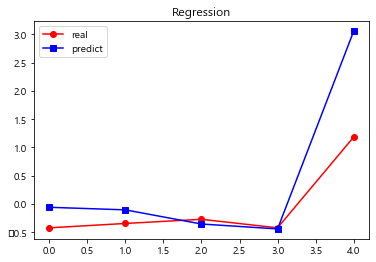

In [48]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression().fit(x_train, y_train)
reg_pred = np.expm1(reg_model.predict(x_test))
print("훈련 세트 정확도: {:.3f}".format(reg_model.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(reg_model.score(x_test, y_test)))

reg_pred=pd.DataFrame(reg_pred)
plt.plot(y_test, 'ro-', label="real")
plt.plot(reg_pred, 'bs-', label="predict")
plt.legend()
plt.title("Regression")
plt.show()

In [52]:
!pip install xgboost 

훈련 세트 정확도: 0.985
테스트 세트 정확도: 0.304
[0.11263675 0.12062579 0.00958743 0.12306447 0.18930092 0.15044795
 0.06006524 0.0106395  0.10916577 0.00801424 0.01885055 0.08760139]


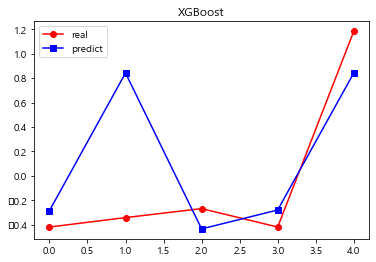

In [54]:
import xgboost as xgb

xgb = xgb.XGBRegressor(colsample_bytree=0.47,
                       gamma= 0.046,
                      learning_rate=0.05,
                      max_depth=5,
                      min_child_weight=1.8,
                      n_estimators=2000).fit(x_train, y_train)
xgb_pred = np.expm1(xgb.predict(x_test))
print("훈련 세트 정확도: {:.3f}".format(xgb.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xgb.score(x_test, y_test)))
print(xgb.feature_importances_)

xgb_pred=pd.DataFrame(xgb_pred)
plt.plot(y_test, 'ro-', label="real")
plt.plot(xgb_pred, 'bs-', label="predict")
plt.legend()
plt.title("XGBoost")
plt.show()

훈련 세트 정확도: 0.629
테스트 세트 정확도: 0.493


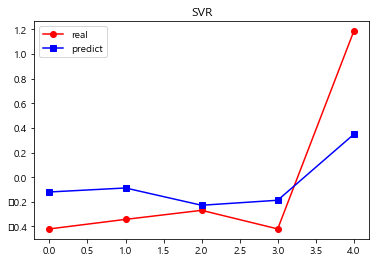

In [55]:
from sklearn.svm import SVR

svr = SVR(C=1.5,
          cache_size=200,
          coef0=0,
          degree=15,
          kernel='rbf',
          shrinking=True).fit(x_train, y_train)

svr_pred = np.expm1(svr.predict(x_test))
print("훈련 세트 정확도: {:.3f}".format(svr.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svr.score(x_test, y_test)))

svr_pred=pd.DataFrame(svr_pred)
plt.plot(y_test, 'ro-', label="real")
plt.plot(svr_pred, 'bs-', label="predict")
plt.legend()
plt.title("SVR")
plt.show()

훈련 세트 정확도: 0.869
테스트 세트 정확도: 0.696
[0.0998488  0.21625686 0.00822903 0.04031111 0.0382078  0.08328123
 0.25685576 0.00978332 0.05581991 0.00599371 0.10825234 0.07716013]


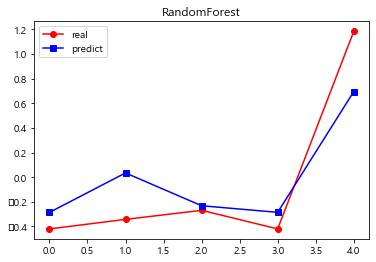

In [56]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=2000).fit(x_train, y_train)

rf_pred = np.expm1(rf.predict(x_test))
print("훈련 세트 정확도: {:.3f}".format(rf.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(rf.score(x_test, y_test)))
print(rf.feature_importances_)

rf_pred=pd.DataFrame(rf_pred)
plt.plot(y_test, 'ro-', label="real")
plt.plot(rf_pred, 'bs-', label="predict")
plt.legend()
plt.title("RandomForest")
plt.show()

# Test

```txt
# 부산전체 x -> 동래구 
# 1998년부터 데이터 필요 

# 하천이 영향을 줄것이다. 
```

In [59]:
df=data

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pay_main  24 non-null     int64  
 1   die       24 non-null     int64  
 2   victim    24 non-null     int64  
 3   area      24 non-null     float64
 4   pay_dis   24 non-null     float64
 5   pay_rec   24 non-null     int64  
 6   tem_mean  24 non-null     float64
 7   tem_hi    24 non-null     float64
 8   tem_lo    24 non-null     float64
 9   rain      24 non-null     float64
 10  win_mean  24 non-null     float64
 11  win_max   24 non-null     float64
 12  win_ins   24 non-null     float64
dtypes: float64(9), int64(4)
memory usage: 2.6 KB


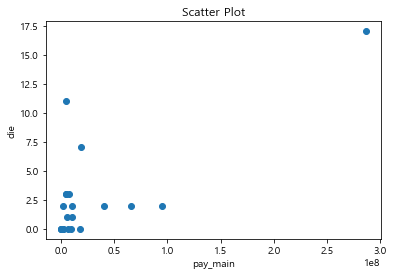

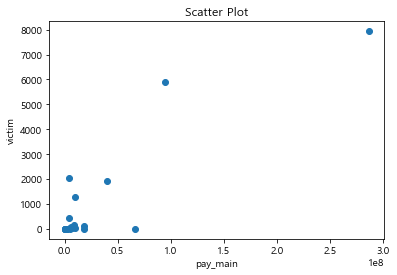

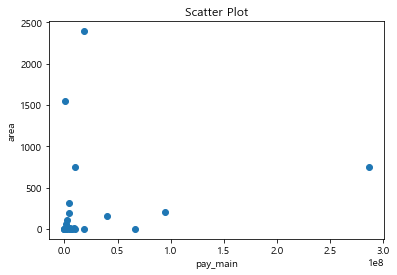

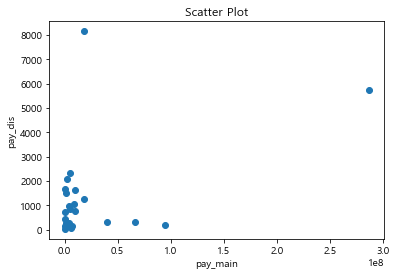

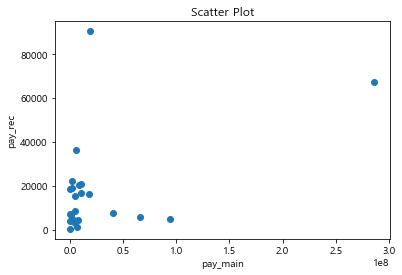

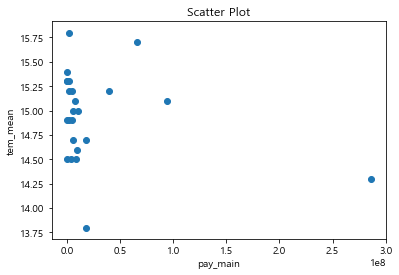

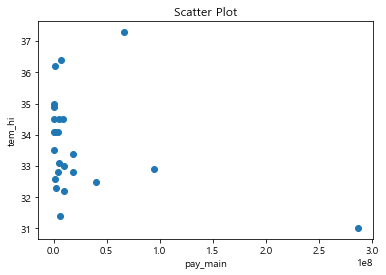

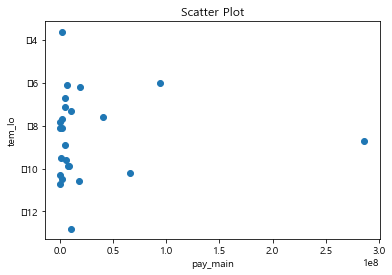

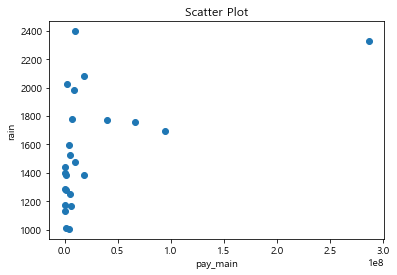

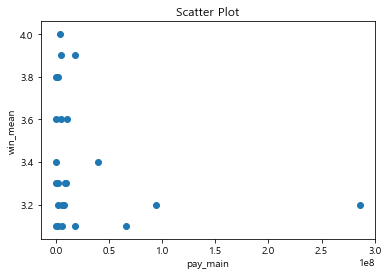

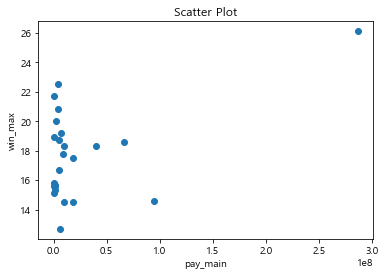

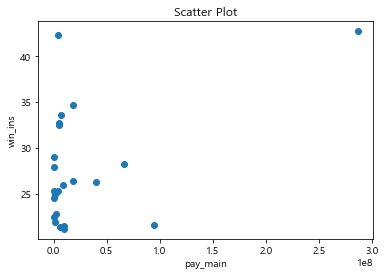

In [64]:
cols = df.columns[1:]
for i in cols:
    scatter_plot = plt.figure()
    axes = scatter_plot.add_subplot(1,1,1)
    axes.scatter(df['pay_main'], df[i])
    plt.title('Scatter Plot')
    plt.xlabel('pay_main')
    plt.ylabel(str(i))
#     print(i)

In [69]:
corr = df[cols].corr(method = 'pearson')

NameError: name 'sns' is not defined

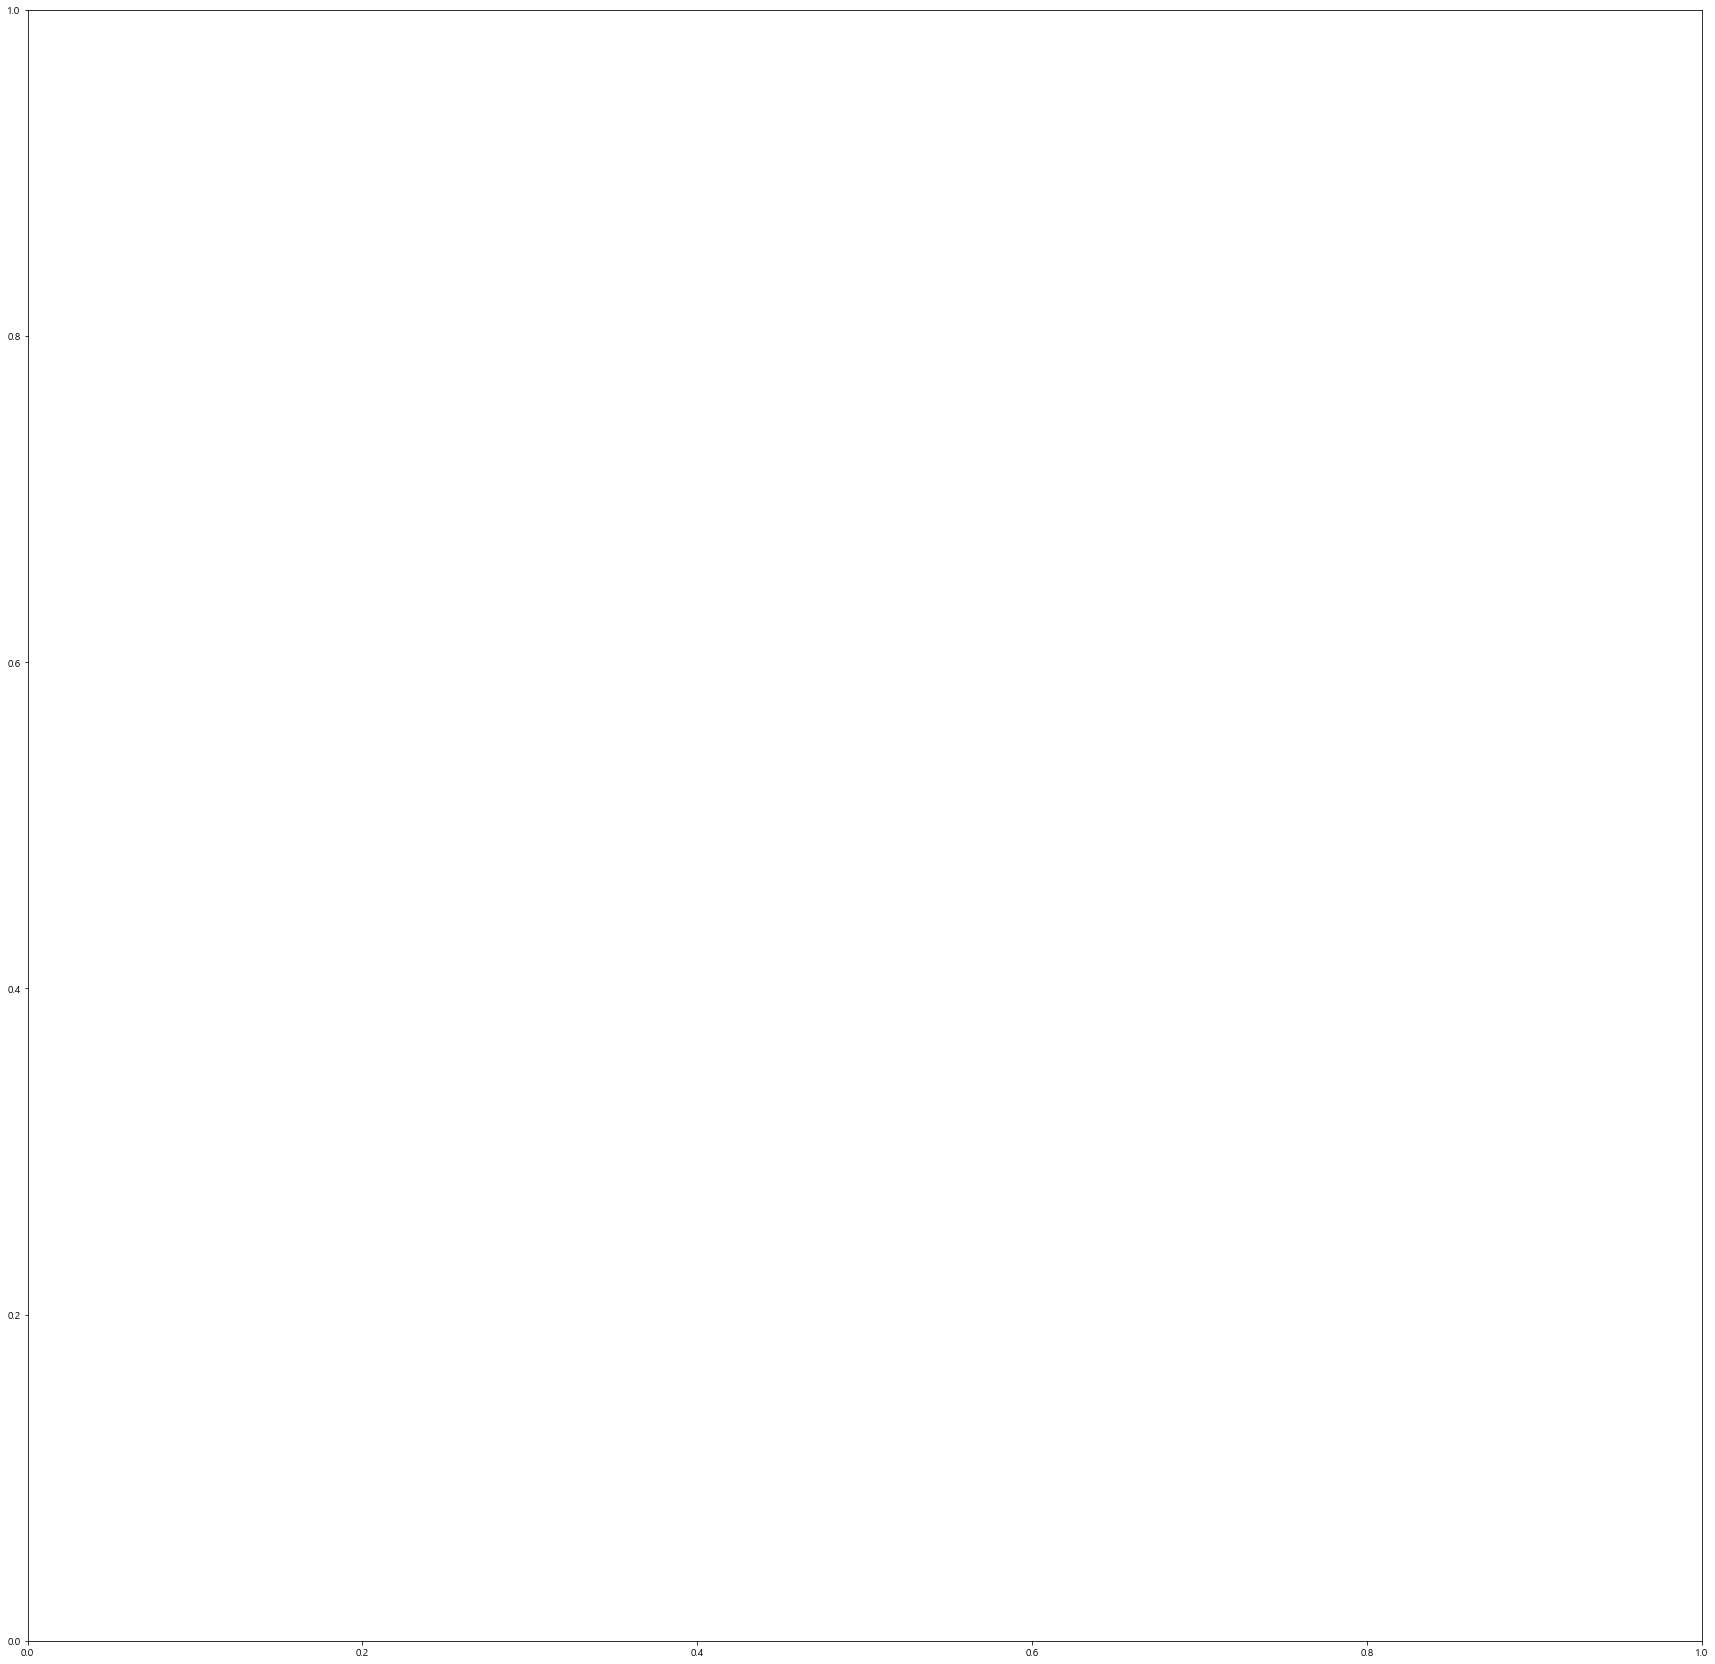

In [70]:
fig = plt.figure(figsize=(30,30))
ax = fig.gca()
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                annot = True,
                fmt ='.2f',
                annot_kws ={'size':30},
                yticklabels=cols,
                xticklabels=cols,
                ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
# 정규화 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_columns =  [
        'Precipitation', 'High_Wind', 'High_field_elevation',
       'Low_field_elevation', 
        'Humidity_Average', 'Low_Humidity', 'Sunshine_Sum',
       'Global_Solar_Radiation_Sum', 'Baechu_Wholesale', 'Price_Info']
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

In [ ]:
import matplotlib.pyplot as plt 

# sklearn
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

In [71]:
X = df[scaler_columns]
y = df['Pogi'] # 변수 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

NameError: name 'scaler_columns' is not defined

In [ ]:
# 표준화 함수 정의
sc = preprocessing.StandardScaler()
# 데이터를 표준화
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

In [ ]:

# 실행해볼 리스트
# clf_ = linear_model.LinearRegression(normalize=False) 
# clf_ = linear_model.Ridge(alpha=.5)
# clf_ = linear_model.LassoLars(alpha=.1) 
# clf_ = RANSACRegressor(random_state=None) 
clf_ = KNeighborsRegressor(n_neighbors=5) # 15 
# clf_ = linear_model.Lasso(alpha=0.1,max_iter=5000)

In [ ]:
clf_.fit(X_train, y_train)
y_pred  = clf_.predict(X_test)

In [ ]:
# KNeighborsRegressor
print('Mean Squared Error :',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print("train 학습 정확도 :", clf_.score(X_train, y_train)) 
print("test 학습 정확도 :", clf_.score(X_test, y_test))